# Week 12

### Student Name: Syed Shahid Shabbir
### DSC-530 - Week12 - Term Final Project
### Filename: Shabbir530Week12

## Term Final Project  :  Week 12
  
A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

Describe what the 5 variables mean in the dataset (Chapter 1).

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [1]:
from __future__ import print_function, division

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import sys
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import thinkstats2
import thinkplot
import math
import scipy.stats
import density
import hinc2
import hinc
import random
import hypothesis
import scatter

In [2]:
# Read the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# How is data collected?
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0] * 100))

Total time spanning: 2.0 days
0.173 % of all transactions are fraud. 


In [4]:
# Categorize Class variable into Fraud and Non-fraud
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# The datasets contains transactions made by credit cards in September 2013 by european cardholders. The transactions occur in two days.
# Time: The seconds elapsed between each transaction and the first transaction in the dataset
# V1 to V28: are the principal components obtained with PCA.
# Amount: Transaction amount in Euro
# Class: The response variable and it takes value 1 in case of fraud and 0 otherwise. (0 = Normal transaction, 1 = Fraud)

In [7]:
# Check to see if dataset has any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Datset format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

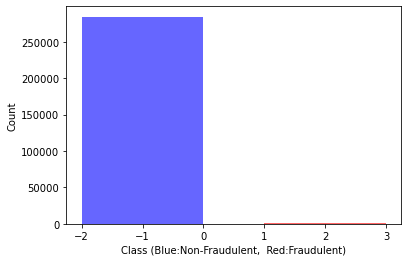

<Figure size 576x432 with 0 Axes>

In [9]:
# Histogram showing counts of Fraud & Non-fraud transactions
fraud = df[df.Class==1]
normal = df[df.Class==0]

fraud_hist = thinkstats2.Hist(fraud.Class)
normal_hist = thinkstats2.Hist(normal.Class)

thinkplot.Hist(fraud_hist, align='left', width=2, color='red')
thinkplot.Hist(normal_hist, align='right', width=2, color='blue')
thinkplot.Show(xlabel='Class (Blue:Non-Fraudulent,  Red:Fraudulent)', ylabel='Count')

#### TASK 1
##### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question –remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [10]:
# 1) Variable 'Class' 
# 2) Variable 'Time' 
# 3) Variable 'Amount' 
# 4) Variable 'V1' 
# 5) Variable 'V2 to V28' 

#### TASK 2
##### Describe what the 5 variables mean in the dataset (Chapter 1).

In [11]:
# 1) Variable 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
# 2) Variable 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
# 3) Variable 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning
# 4) Variable 'V1' the first principal component obtained with PCA, credit card holder with the first transaction
# 5) Variable 'V2 to V28' the principal components obtained with PCA.

#### TASK 3
##### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

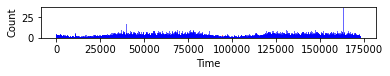

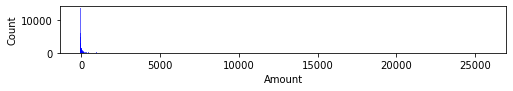

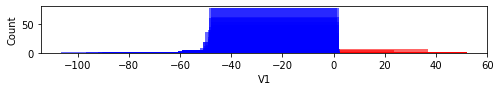

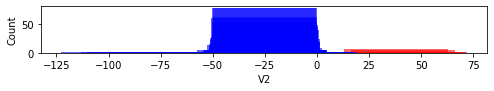

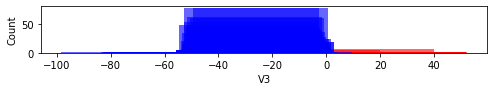

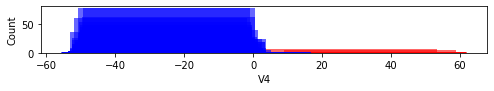

<Figure size 576x432 with 0 Axes>

In [12]:
thinkplot.PrePlot(rows=6)

thinkplot.SubPlot(1)
fraud_hist1 = thinkstats2.Hist(np.float64(fraud.Time).flatten())
normal_hist1 = thinkstats2.Hist(np.float64(normal.Time).flatten())
thinkplot.Hist(fraud_hist1, align='left', width=50, color='red')
thinkplot.Hist(normal_hist1, align='right', width=50, color='blue')
thinkplot.Show(xlabel='Time', ylabel='Count')

thinkplot.SubPlot(2)
fraud_hist1 = thinkstats2.Hist(fraud.Amount)
normal_hist1 = thinkstats2.Hist(normal.Amount)
thinkplot.Hist(fraud_hist1, align='left', width=50, color='red')
thinkplot.Hist(normal_hist1, align='right', width=50, color='blue')
thinkplot.Show(xlabel='Amount', ylabel='Count')

thinkplot.SubPlot(3)
fraud_hist2 = thinkstats2.Hist(fraud.V1)
normal_hist2 = thinkstats2.Hist(normal.V1)
thinkplot.Hist(fraud_hist2, align='left', width=50, color='red')
thinkplot.Hist(normal_hist2, align='right', width=50, color='blue')
thinkplot.Show(xlabel='V1', ylabel='Count')

thinkplot.SubPlot(4)
fraud_hist3 = thinkstats2.Hist(fraud.V2)
normal_hist3 = thinkstats2.Hist(normal.V2)
thinkplot.Hist(fraud_hist3, align='left', width=50, color='red')
thinkplot.Hist(normal_hist3, align='right', width=50, color='blue')
thinkplot.Show(xlabel='V2', ylabel='Count')

thinkplot.SubPlot(5)
fraud_hist4 = thinkstats2.Hist(fraud.V3)
normal_hist4 = thinkstats2.Hist(normal.V3)
thinkplot.Hist(fraud_hist4, align='left', width=50, color='red')
thinkplot.Hist(normal_hist4, align='right', width=50, color='blue')
thinkplot.Show(xlabel='V3', ylabel='Count')

thinkplot.SubPlot(6)
fraud_hist5 = thinkstats2.Hist(fraud.V4)
normal_hist5 = thinkstats2.Hist(normal.V4)
thinkplot.Hist(fraud_hist5, align='left', width=50, color='red')
thinkplot.Hist(normal_hist5, align='right', width=50, color='blue')
thinkplot.Show(xlabel='V4', ylabel='Count')

#### TASK 4
##### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [12]:
print("Fraud transaction statistics")
print(fraud['Amount'].describe())
print("\nNormal transaction statistics")
print(normal['Amount'].describe())

df[['Time','Amount','Class','V1','V2','V3','V4']].describe()

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


,Time,Amount,Class,V1,V2,V3,V4
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,88.349619,0.001727,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15
std,47488.145955,250.120109,0.041527,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00
25%,54201.500000,5.600000,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01
50%,84692.000000,22.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02
75%,139320.500000,77.165000,0.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01
max,172792.000000,25691.160000,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01


In [13]:
# Observations:
# The mean value of fradulent transactions is 122.21 while mean value of valid transactions is only 88.29.
# 50% of the fradulent transactions are below 10 while 50% of valid transactions are below 23.
# 75% of the fradulent transactions are below 106 while 75% of valid transactions are below 78.
# Max value of fradulent transaction is 2125.87 while max value of valid transaction is 25691.16

#### TASK 5
##### Using page 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [14]:
pmf = thinkstats2.Pmf(df.Class, label='Class')

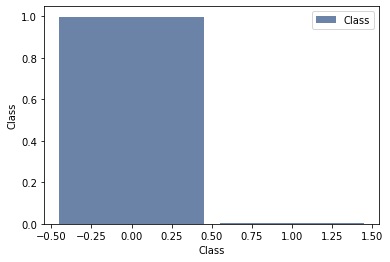

In [15]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Class', ylabel='Class')

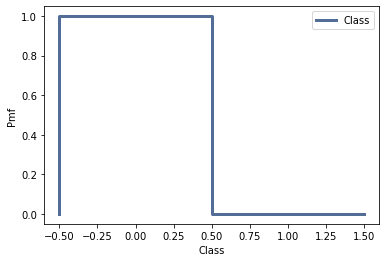

In [16]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Class', ylabel='Pmf')

In [17]:
fraud_pmf = thinkstats2.Pmf(fraud.Time, label='Fraud')
normal_pmf = thinkstats2.Pmf(normal.Time, label='Normal')

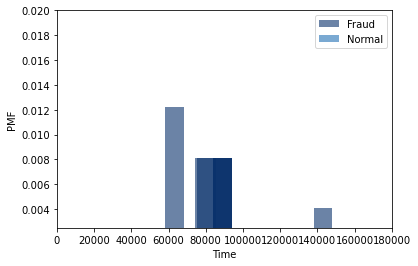

In [18]:
width=10000
axis = [0, 180000, 0.0025, 0.02]
thinkplot.Hist(fraud_pmf, align='right', width=width)
thinkplot.Hist(normal_pmf, align='left', width=width)
thinkplot.Config(xlabel='Time', ylabel='PMF', axis=axis)

#### TASK 6
##### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

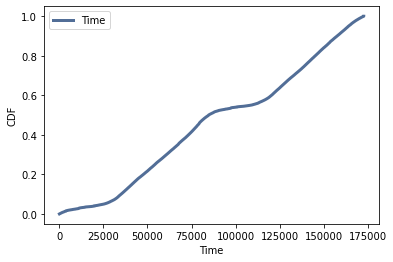

<Figure size 576x432 with 0 Axes>

In [19]:
cdf = thinkstats2.Cdf(df.Time, label='Time')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Time', ylabel='CDF')

#### TASK 7
##### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [20]:
amounts = df.Amount.dropna()

In [21]:
def MakeNormalModel(amounts):
    
    cdf = thinkstats2.Cdf(amounts, label='Amount (in Euros)')

    mean, var = thinkstats2.TrimmedMeanVar(amounts)
    std = np.sqrt(var)
    print('n, mean, std', len(amounts), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 284807 71.44127888187855 129.51284817810273


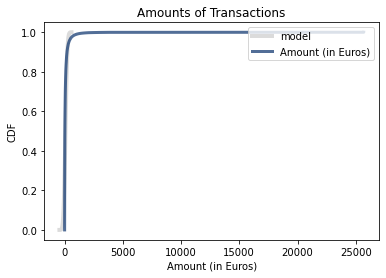

In [22]:
MakeNormalModel(amounts)
thinkplot.Config(title='Amounts of Transactions', xlabel='Amount (in Euros)',
                 ylabel='CDF', loc='upper right')

#### TASK 8
##### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).

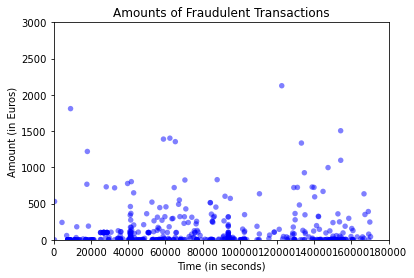

In [23]:
thinkplot.Scatter(fraud.Time, fraud.Amount, alpha=0.5)
thinkplot.Config(xlabel='Time (in seconds)',
                 ylabel='Amount (in Euros)',
                 axis=[0, 180000, 0, 3000],
                 title = 'Amounts of Fraudulent Transactions',
                 legend=False)

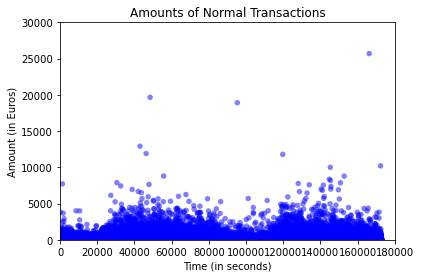

In [24]:
thinkplot.Scatter(normal.Time, normal.Amount, alpha=0.5)
thinkplot.Config(xlabel='Time (in seconds)',
                 ylabel='Amount (in Euros)',
                 axis=[0, 180000, 0, 30000],
                 title = 'Amounts of Normal Transactions',
                 legend=False)

In [25]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr


def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [26]:
print('Covariance between Time and Amount for Non-Fraudulent transactions is:{:.3f}'.format(Cov(normal.Time, normal.Amount)))
print('Covariance between Time and Amount for Fraudulent transactions is:{:.3f}'.format(Cov(fraud.Time, fraud.Amount)))
print('\nPearson Correlation between Time and Amount for Non-Fraudulent transactions is:{:.4f}'.format(Corr(normal.Time, normal.Amount)))
print('Pearson Correlation between Time and Amount for Fraudulent transactions is:{:.4f}'.format(Corr(fraud.Time, fraud.Amount)))
print('\nSpearman Correlation between Time and Amount for Non-Fraudulent transactions is:{:.4f}'.format(SpearmanCorr(normal.Time, normal.Amount)))
print('Spearman Correlation between Time and Amount for Fraudulent transactions is:{:.4f}'.format(SpearmanCorr(fraud.Time, fraud.Amount)))

Covariance between Time and Amount for Non-Fraudulent transactions is:-126285.952
Covariance between Time and Amount for Fraudulent transactions is:597140.066

Pearson Correlation between Time and Amount for Non-Fraudulent transactions is:-0.0106
Pearson Correlation between Time and Amount for Fraudulent transactions is:0.0487

Spearman Correlation between Time and Amount for Non-Fraudulent transactions is:-0.0402
Spearman Correlation between Time and Amount for Fraudulent transactions is:0.0164


In [27]:
# Time has negative correlation (-0.01) with Amount for Normal transactions. This means that they have absolutely no relevance with each other.
# Time has positive, but very weak, correlation (0.05) with Amount for Fraudulent transactions.

#### TASK 9
##### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [28]:
import hypothesis

In [29]:
# set up functions to run the samples
class DiffMeans(hypothesis.DiffMeansPermute):
    """ Test a diff in means """

    def RunModel(self):
        """ Run model for null hypothesis """

        g1 = np.random.choice(self.pool, self.n, replace=True)
        g2 = np.random.choice(self.pool, self.m, replace=True)

        return g1, g2

def RunSampleTest(fraud, normal):
    """ Test diff in mean 
    """
    
    data = fraud.Amount.values, normal.Amount.values
    ht = DiffMeans(data)
    pVal = ht.PValue(iters=10000)

    print("\nMeans permute Transaction Amounts (in Euros)")
    print("P Value: {:.3f}".format(pVal))
    print("Actual: {:.3f}".format(ht.actual))
    print("T-test max: {:.3f}".format(ht.MaxTestStat()))

    
    data = (fraud.Time.dropna().values,
            normal.Time.dropna().values)
    ht = hypothesis.DiffMeansPermute(data)
    pVal = ht.PValue(iters=10000)
    print("\nMeans permute Transaction Times (in seconds)")
    print("P Value: {:.3f}".format(pVal))
    print("Actual: {:.3f}".format(ht.actual))
    print("T-test max: {:.3f}".format(ht.MaxTestStat()))

def RunTests(df, iters=1000):
    """ Run tests from chap 9 
 
    """
    n = len(df)
    fraud = df[df.Class==1]
    normal = df[df.Class==0]

    # compare pregnancy lengths
    data = fraud.Amount.values, normal.Amount.values
    ht = hypothesis.DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    data = (fraud.Time.dropna().values,
            normal.Time.dropna().values)
    ht = hypothesis.DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)

    # test correlation
    df2 = df.dropna(subset=['Amount', 'Time'])
    data = df2.Amount.values, df2.Time.values
    ht = hypothesis.CorrelationPermute(data)
    p3 = ht.PValue(iters=iters)

    # compare pregnancy lengths (chi-squared)
    data = fraud.Amount.values, normal.Amount.values
    ht = hypothesis.PregLengthTest(data)
    p4 = ht.PValue(iters=iters)

    print("{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(n, p1, p2, p3, p4))

In [30]:
thinkstats2.RandomSeed(18)

RunSampleTest(fraud, normal)


Means permute Transaction Amounts (in Euros)
P Value: 0.008
Actual: 33.920
T-test max: 71.557

Means permute Transaction Times (in seconds)
P Value: 0.000
Actual: 14091.395
T-test max: 8186.848


In [31]:
n = len(df)
print("nval\t Test1\t  Test2\t  Test3\t  Test4\t")
for i in range(7):
    sample = thinkstats2.SampleRows(df, n)
    RunTests(sample)
    n //= 2

nval	 Test1	  Test2	  Test3	  Test4	
284807	0.002	0.000	0.000	0.888
142403	0.020	0.000	0.000	0.893
71201	0.035	0.007	0.016	1.000
35600	0.216	0.012	0.000	1.000
17800	0.874	0.049	0.272	0.166
8900	0.572	0.034	0.433	1.000


C:\Users\farid\Desktop\Syed\bellevue university\DSC530\DSC530 Exercises\Week12\hypothesis.py:189: RuntimeWarning: invalid value encountered in true_divide
  stat = sum((observed - expected)**2 / expected)


4450	0.415	0.600	0.119	0.000


#### TASK 10
##### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [32]:
import statsmodels.formula.api as smf

formula = 'Amount ~ Time'

model = smf.ols(formula, data=df)
results = model.fit()

In [33]:
inter = results.params['Intercept']
slope = results.params['Time']

slope_pvalue = results.pvalues['Time']

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     31.98
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.56e-08
Time:                        20:08:14   Log-Likelihood:            -1.9768e+06
No. Observations:              284807   AIC:                         3.954e+06
Df Residuals:                  284805   BIC:                         3.954e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.6413      1.047     89.480      0.0

In [34]:
diff_amounts = normal.Amount.mean() - fraud.Amount.mean()

diff_times = normal.Time.mean() - fraud.Time.mean()

results = smf.ols('Amount ~ Time', data=df).fit()
slope = results.params['Time']
slope

-5.581110856906319e-05

In [35]:
slope * diff_times

-0.7864563956283411

#### Conclusions:
1. The given data is highly imbalanced as 99.9982% of data belonging to class 0 and just .0017% data belonging to class 1.
2. In given data 75% of the transactions are of amount below 78.
3. The min value of transaction made is 0.00 and max value of transaction is 25691.16
4. Out of 284k transactions 1825 transactions were made which had zero value.
5. Out of these transactions only 27 were fraudulent and 1798 legal transactions.
6. The mean value of fraudulent transactions is 122.21 while mean value of valid transactions is only 88.29.
7. 50% of the fraudulent transactions are below 10 while 50% of valid transactions is below 22.
8. 75% of the fraudulent transactions are below 106 while 75% of valid transactions are below 77.
9. Max value of fraudulent transaction is 2125.87 while max value of valid transaction is 25691.16
10. More fraudulent transaction occurs between first 12 hours and between 23rd and 30th hour.
11. If transaction were recorded from 12'o clock midnight then we can observe that during morning hours there is more chance of occurrence of fraud transactions. During rest of the time more chance that legal transaction will occur.
12. On the first day 20.5% of the total fraudulent transactions were done in less than 10 hours.
13. On the second day 14.02% of the total fraudulent transactions were done in less than 6 hours.
14. 93.22% of all the legal transactions(Class 0) have V4 value less than 2.
15. 80.04% of all the fraudulent transactions(Class 1) have V4 value greater than 2.
16. 96.76% of valid transactions (Class 0) have V9 > -2.
17. 52.23% of fraudulent transaactions (Class 1) have V9 < -2.
18. 96.52% of legal transactions (Class 0) have V3 > -2.7.
19. 71.11% of fraudulent transactions (Class 1) have V3 < -2.7.
20. 99% of the legal transactions are of value less than 2000.
21. 99% of the fraudulent transactions are of value less than 1250.